In [1]:
import warnings
warnings.filterwarnings('ignore')

%load_ext rpy2.ipython

%run ../notebook-init.py

# load R libraries                                                                                    
%R invisible(library(ggplot2))
%R invisible(library(fastcluster))
%R invisible(library(reshape))
%R invisible(library(reshape2))
%R invisible(library(gplots))
%R invisible(library(RSQLite))

#set up ggplot2 defaults                                                                              
%R theme_set(theme_gray(base_size=18))

%pylab inline
pylab.rcParams['figure.figsize'] = (20, 20)



Populating the interactive namespace from numpy and matplotlib


In [2]:
%%R
prettyname <- function(ugly){
    names = c(
        'gpigfecal.dna', 
        'filtered.stool.day0',  
        'filtered.stool.day14', 
        'rumen.rnalow',         
        'rumen.rnahigh',
        'cowrumen.dna',
        'human.anterior.nares',
        'human.stool',
        'human.posterior.fornix',
        'human.throat',
        'human.qin.CD',
        'human.qin.HEALTHY',
        'human.qin.UC'

    )

    classes = c(
        'Guinea Pig Stool DNA',
        'Healthy Mouse Stool RNA',
        'Colitic Mouse Stool RNA',
        'Sheep Rumen, low-methane prod. RNA',
        'Sheep Rumen, high-methane prod. RNA',
        'Cow Rumen DNA',
        'HMP Anterior Nares DNA',
        'HMP Stool DNA',
        'HMP Posterior Fornix DNA',
        'HMP Throat DNA',
        'CD Human Stool, Qin et al DNA',
        'Healthy Human Stool, Qin et al DNA',
        'UC Human Stool, Qin et al DNA'
    )
    
    ougly <- ugly
    ugly <- strsplit(ugly,c("[\\_\\.\\-]"),fixed=F)[[1]]

    
    i <- 1
    for (name in names){
    
        
        name <- strsplit(name,c("[\\_\\.\\-]"),fixed=F)[[1]]

        if( all(ugly==name)){
            return( classes[i])
        } 
        i <- i+1
    }
    return(ougly)
    
}

print(prettyname("gpigfecal.dna"))
print(prettyname("human.posterior_fornix"))
print(prettyname("cowrumen.dna"))
print(prettyname("human.anterior_nares"))


[1] "Guinea Pig Stool DNA"
[1] "HMP Posterior Fornix DNA"
[1] "Cow Rumen DNA"
[1] "HMP Anterior Nares DNA"


[1] "../taxonomic-profiles/kraken/human.species.kraken.aggregated.counts.tsv.gz"
 [1] HMP Anterior Nares DNA   HMP Anterior Nares DNA   HMP Anterior Nares DNA  
 [4] HMP Anterior Nares DNA   HMP Anterior Nares DNA   HMP Anterior Nares DNA  
 [7] HMP Anterior Nares DNA   HMP Anterior Nares DNA   HMP Anterior Nares DNA  
[10] HMP Anterior Nares DNA   HMP Posterior Fornix DNA HMP Posterior Fornix DNA
[13] HMP Posterior Fornix DNA HMP Posterior Fornix DNA HMP Posterior Fornix DNA
[16] HMP Posterior Fornix DNA HMP Posterior Fornix DNA HMP Posterior Fornix DNA
[19] HMP Posterior Fornix DNA HMP Posterior Fornix DNA HMP Stool DNA           
[22] HMP Stool DNA            HMP Stool DNA            HMP Stool DNA           
[25] HMP Stool DNA            HMP Stool DNA            HMP Stool DNA           
[28] HMP Stool DNA            HMP Stool DNA            HMP Stool DNA           
[31] HMP Throat DNA           HMP Throat DNA           HMP Throat DNA          
[34] HMP Throat DNA           HMP Throa

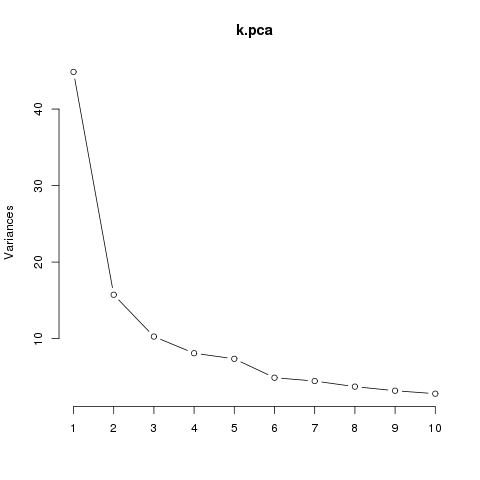

In [6]:
%%R

##########################################################
##########################################################
#
# KRAKEN
#
##########################################################
##########################################################


tableNames <- Sys.glob('../taxonomic-profiles/kraken/human.species.kraken.aggregated.counts.tsv.gz')
print(tableNames)

k.classes <- c()
kraken <- matrix(0,0,0)
k.raw <- matrix(0,0,0)
for (tbl in tableNames){
    tbl <- read.table(tbl,header=T,blank.lines.skip=T,sep="\t",row.names=1)
    classesInTbl <- lapply(colnames(tbl),function(n){prettyname(strsplit(n,'\\.R')[[1]][1])})
    
    tbl[is.na(tbl)] <- 0
    
    k.raw <- merge(k.raw,tbl,by="row.names",all=T)
    k.raw[is.na(k.raw)] <- 0 
    rownames(k.raw) <- k.raw[,1]
    k.raw <- k.raw[,-1]
    
    tbl <- data.matrix(tbl)
    tbl <- sweep(tbl,2,colSums(tbl),function(el,n){ log2(1000000*el/n)})
    tbl <- apply(tbl,1:2,max,0)
    #tbl <- tbl[apply(tbl, 1, function(row) any(row !=0 )),]

    k.classes <- c(k.classes,  unlist(classesInTbl))
    kraken <- merge(kraken,tbl,by="row.names",all=T)
    kraken[is.na(kraken)] <- 0 
    rownames(kraken) <- kraken[,1]
    kraken <- kraken[,-1]
}
k.classes <- as.factor(k.classes)
print(k.classes)
print(kraken[1:2,1:4])
kraken <- kraken[apply(kraken, 1, function(row) any(row !=0 )),]

k.pca <- prcomp(t(kraken),center=T,scale=T)
plot(k.pca,type='l')

[1] "../taxonomic-profiles/metaphlan/human.human-anterior_nares-R011132.mp2prof.tsv"
[1] "../taxonomic-profiles/metaphlan/human.human-anterior_nares-R012663.mp2prof.tsv"
[1] "../taxonomic-profiles/metaphlan/human.human-anterior_nares-R014464.mp2prof.tsv"
[1] "../taxonomic-profiles/metaphlan/human.human-anterior_nares-R014901.mp2prof.tsv"
[1] "../taxonomic-profiles/metaphlan/human.human-anterior_nares-R015996.mp2prof.tsv"
[1] "../taxonomic-profiles/metaphlan/human.human-anterior_nares-R018981.mp2prof.tsv"
[1] "../taxonomic-profiles/metaphlan/human.human-anterior_nares-R022129.mp2prof.tsv"
[1] "../taxonomic-profiles/metaphlan/human.human-anterior_nares-R046973.mp2prof.tsv"
[1] "../taxonomic-profiles/metaphlan/human.human-anterior_nares-R050025.mp2prof.tsv"
[1] "../taxonomic-profiles/metaphlan/human.human-anterior_nares-R056210.mp2prof.tsv"
[1] "../taxonomic-profiles/metaphlan/human.human-posterior_fornix-R011355.mp2prof.tsv"
[1] "../taxonomic-profiles/metaphlan/human.human-posterior_forn

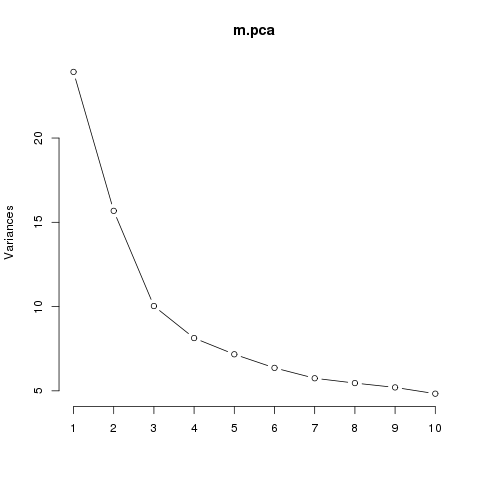

In [39]:
%%R

##########################################################
##########################################################
#
# METAPHLAN2
#
##########################################################
##########################################################

tableNames <- Sys.glob('../taxonomic-profiles/metaphlan/human.*.mp2prof.tsv')

m.classes <- c()
mphlan <- matrix(0,0,0)

getTable <- function(tblName){
    out <- tryCatch(
        {
            tbl <- read.table(tblName,blank.lines.skip=T,sep="\t",row.names=1)
            return(tbl)
        },
        error=function(cond){
            return(FALSE)
        },
        warning=function(cond){
            return(FALSE)
        },
        finally={
            
        }
    )
    return(out)
}


for (tblName in tableNames){
    print(tblName)
    tbl <- getTable(tblName)
    if(!tbl){
        next
    }

    class <- tail(strsplit(strsplit(tblName,'-R')[[1]][1],'/')[[1]],1)
    class <- tail(strsplit(class,'\\.')[[1]],1)
    class <- prettyname(class)
    sample <- tail(strsplit(strsplit(tblName,'\\.mp2')[[1]][1],'/')[[1]],1)
    genera <- rownames(tbl)[grep('g__',rownames(tbl))]
    genera <- genera[grep('s__',genera,invert=T)]
    tbl <-tbl[rownames(tbl) %in% genera,,drop=F]
    m.classes <- c(m.classes,class)
    newcolnames <- c(colnames(mphlan),sample)
    mphlan <- merge(mphlan,tbl,by="row.names",all=T)
    mphlan[is.na(mphlan)] <- 0
    rownames(mphlan) <- mphlan[,1]
    mphlan <- mphlan[,-1,drop=F]
    colnames(mphlan) <- newcolnames
}
m.classes <- factor(m.classes)
print(m.classes)
print(mphlan[1:5,1:4])

m.pca <- prcomp(t(mphlan),center=T,scale=T)
plot(m.pca,type='l')





In [80]:
%%R

##########################################################
##########################################################
#
# ICA Plots
#
##########################################################
##########################################################

library(ggplot2)
library(gridExtra)
library(factoextra)

plotICA <- function(ica, classes){
    
    df <- data.frame(ica$S)
    df['Groups'] = classes
    combs <- combn(1:dim(ica$S)[2],2,simplify=F)
    for (comb in combs){
        X = colnames(df)[comb[1]]
        Y = colnames(df)[comb[2]]
        p <- ggplot(df,aes(x=X,y=Y, color=Groups)) +
                geom_point(size=4) +
                stat_ellipse(geom = "polygon", alpha = 1/10,aes(fill=Groups)) +
                theme(legend.position="none") +
                theme_minimal()
        print(p)
    }
}


[1] "../taxonomic-profiles/ac-diamond-fast/hmp.species.acdmndfast.aggregated.counts.tsv.gz"
[1] "../taxonomic-profiles/ac-diamond-fast/hmp.species.acdmndfast.aggregated.counts.tsv.gz"
 [1] HMP Posterior Fornix DNA HMP Anterior Nares DNA   HMP Posterior Fornix DNA
 [4] HMP Stool DNA            HMP Throat DNA           HMP Throat DNA          
 [7] HMP Stool DNA            HMP Throat DNA           HMP Anterior Nares DNA  
[10] HMP Stool DNA            HMP Throat DNA           HMP Throat DNA          
[13] HMP Posterior Fornix DNA HMP Stool DNA            HMP Anterior Nares DNA  
[16] HMP Anterior Nares DNA   HMP Posterior Fornix DNA HMP Anterior Nares DNA  
[19] HMP Stool DNA            HMP Stool DNA            HMP Posterior Fornix DNA
[22] HMP Anterior Nares DNA   HMP Stool DNA            HMP Anterior Nares DNA  
[25] HMP Stool DNA            HMP Anterior Nares DNA   HMP Anterior Nares DNA  
[28] HMP Stool DNA            HMP Throat DNA           HMP Stool DNA           
[31] HMP Posteri

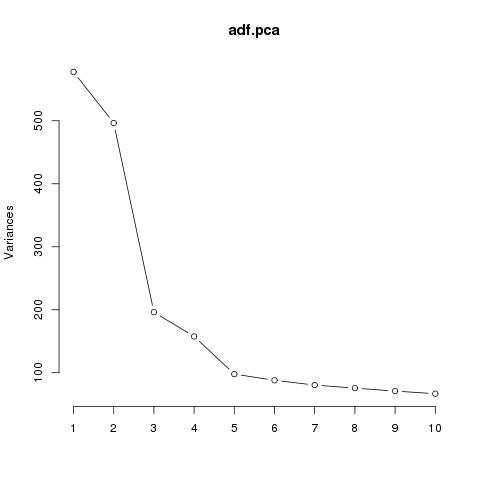

In [5]:

%%R

##########################################################
##########################################################
#
# AC-DIAMOND FAST
#
##########################################################
##########################################################

tableNames <- Sys.glob('../taxonomic-profiles/ac-diamond-fast/hmp*.species.*dmndfast.aggregated.counts.tsv.gz')
print(tableNames)

adf.classes <- c()
acdmndfast <- matrix(0,0,0)
adf.raw <- matrix(0,0,0)
for (tbl in tableNames){
    print(tbl)
    tbl <- read.table(tbl,header=T,blank.lines.skip=T,sep="\t",row.names=1)
    classesInTbl <- lapply(colnames(tbl),function(n){prettyname(strsplit(n,'\\.R')[[1]][1])})

    adf.raw <- merge(adf.raw,tbl,by="row.names",all=T)
    adf.raw[is.na(adf.raw)] <- 0 
    rownames(adf.raw) <- adf.raw[,1]
    adf.raw <- adf.raw[,-1]
    
    tbl[is.na(tbl)] <- 0
    tbl <- data.matrix(tbl)
    tbl <- sweep(tbl,2,colSums(tbl),function(el,n){ log2(1000000*el/n)})
    tbl <- apply(tbl,1:2,max,0)
    #tbl <- tbl[apply(tbl, 1, function(row) any(row !=0 )),]

    adf.classes <- c(adf.classes,  unlist(classesInTbl))
    acdmndfast <- merge(acdmndfast,tbl,by="row.names",all=T)
    acdmndfast[is.na(acdmndfast)] <- 0 

    rownames(acdmndfast) <- acdmndfast[,1]
    acdmndfast <- acdmndfast[,-1]
}
adf.classes <- factor(adf.classes)
print(adf.classes)
acdmndfast <- acdmndfast[apply(acdmndfast, 1, function(row) any(row !=0 )),]  
    
print(length(adf.classes))
print(dim(acdmndfast))
print(acdmndfast[1:5,1:4])
            

adf.pca <- prcomp(t(acdmndfast),center=T,scale=T)
plot(adf.pca,type='l')                    


In [92]:
%%R

##########################################################
##########################################################
#
# PCA Plots
#
##########################################################
##########################################################

library(ggplot2)
library(gridExtra)
library(factoextra)

plotPCA <- function(comps, pca, classes){
    
        df <- data.frame(pca$x)
        df['Groups'] = classes
        combs <- combn(comps,2,simplify=F)
        for (comb in combs){
            X = colnames(df)[comb[1]]
            Y = colnames(df)[comb[2]]
            p <- ggplot(df,aes_string(x=X,y=Y, color="Groups"),legend.position="none") +
                    geom_point(size=4) +
                    scale_shape_manual(values=c(3,16,17)) +
                    stat_ellipse(geom = "polygon", alpha = 1/10,aes_string(fill="Groups")) +
                    theme_minimal()
            print(p)
        }

}


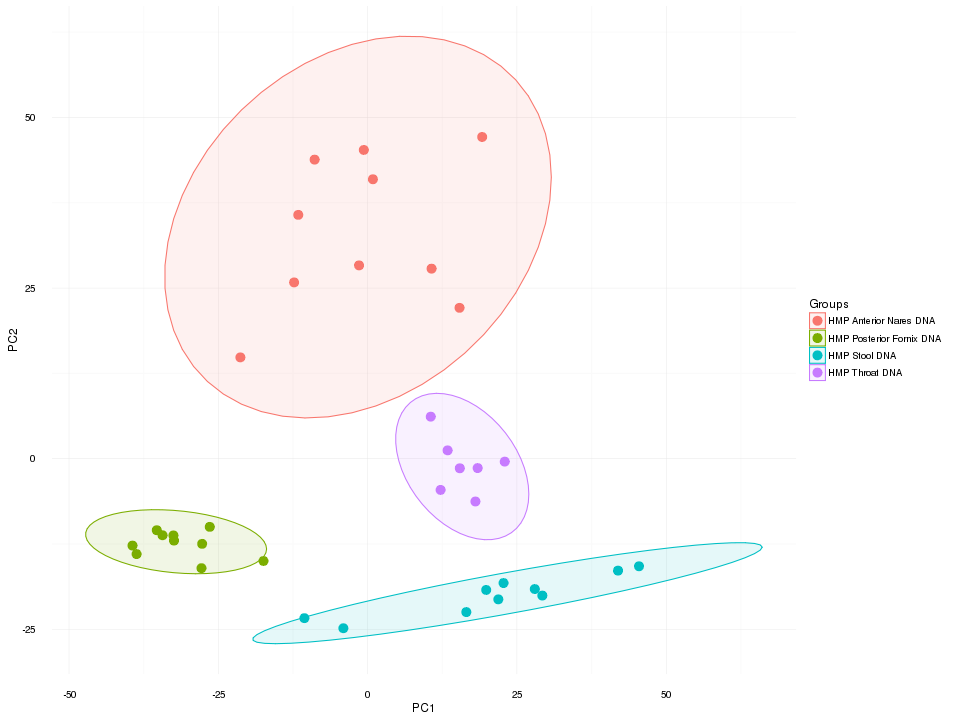

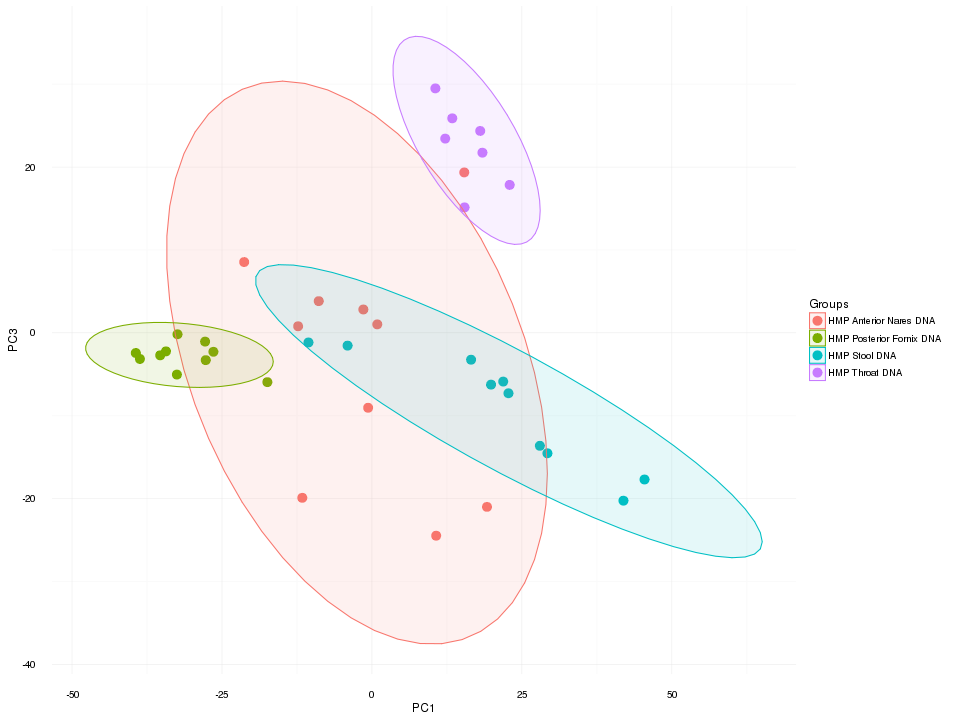

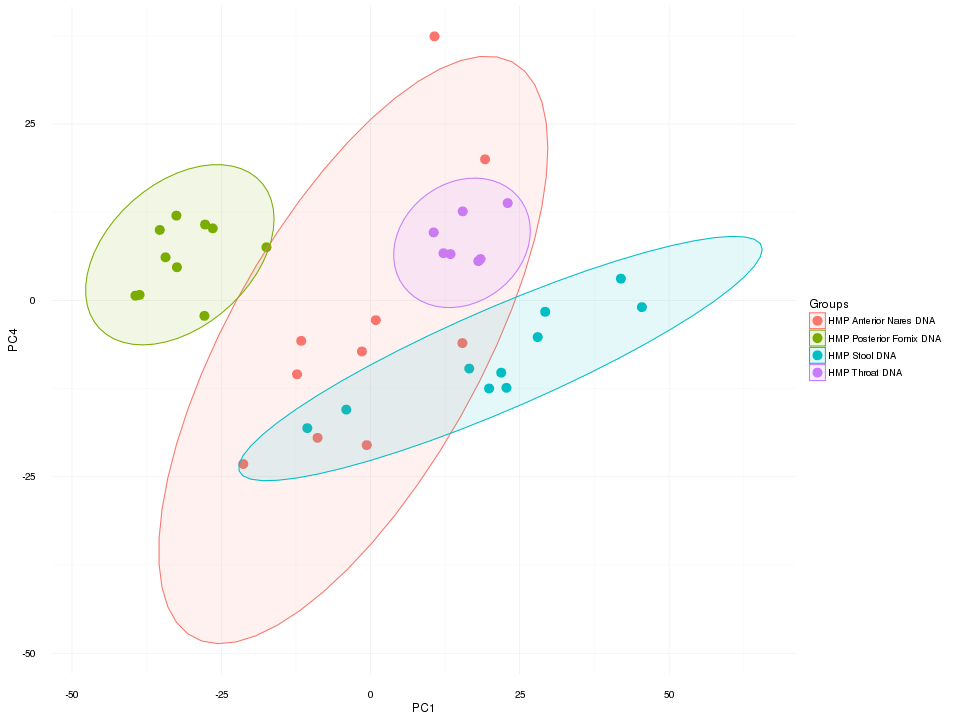

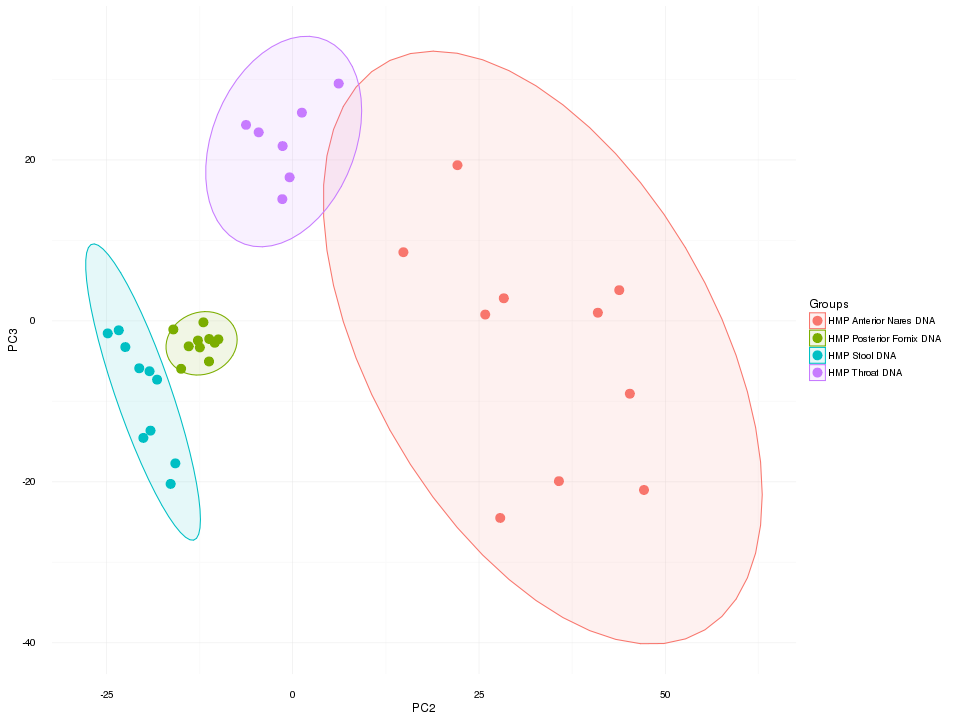

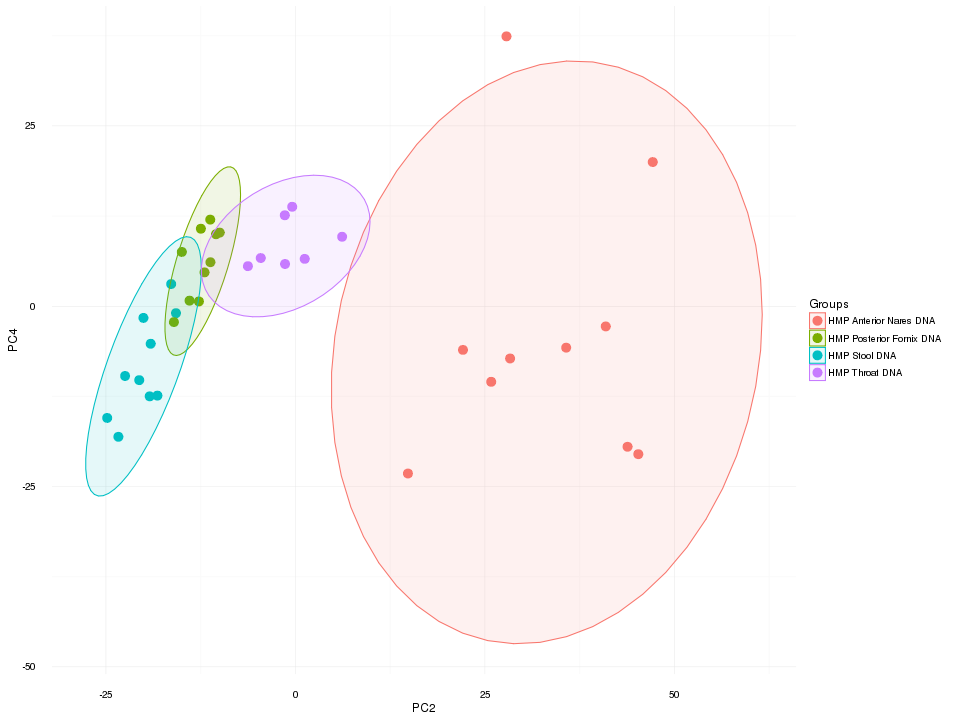

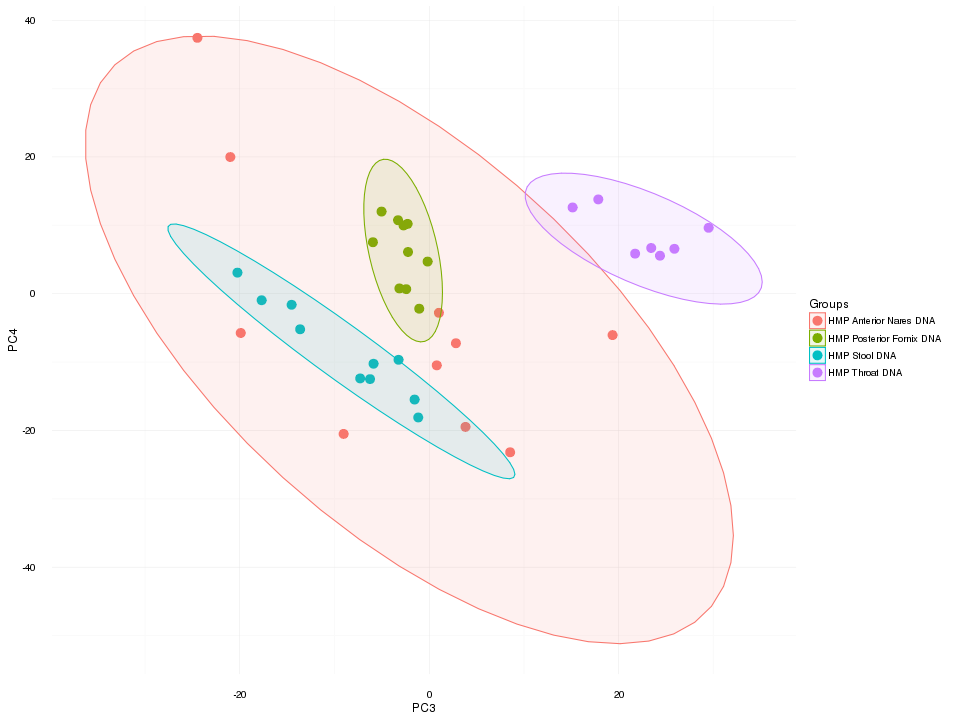

In [95]:
%%R -w 960 -h 720 -u px

plotPCA(1:4, adf.pca, adf.classes)

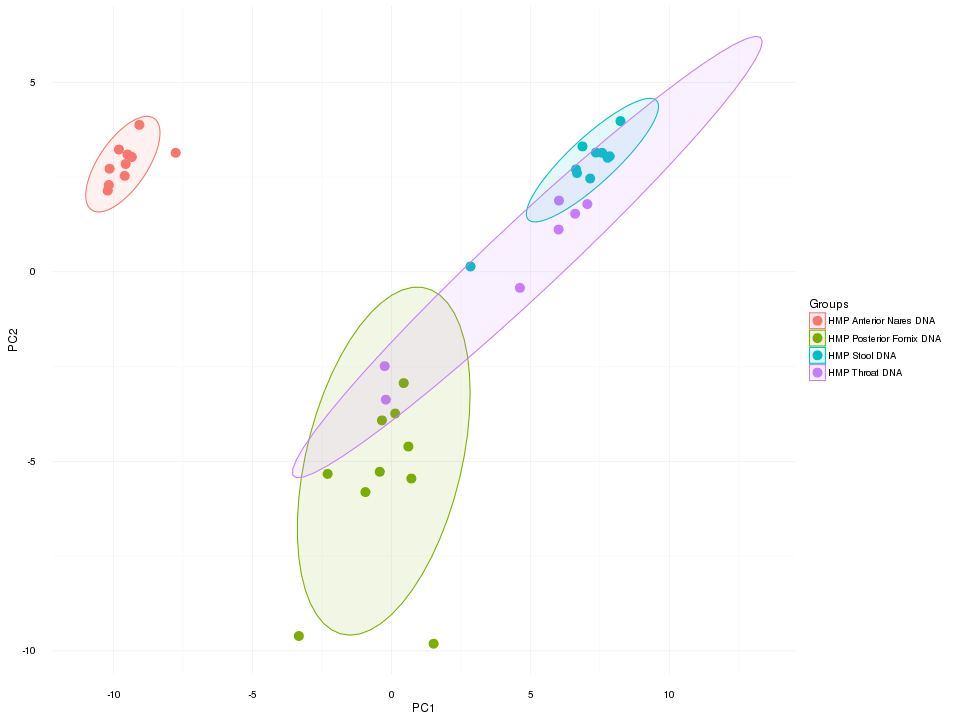

In [98]:
%%R -w 960 -h 720 -u px
plotPCA(1:2, k.pca, k.classes)

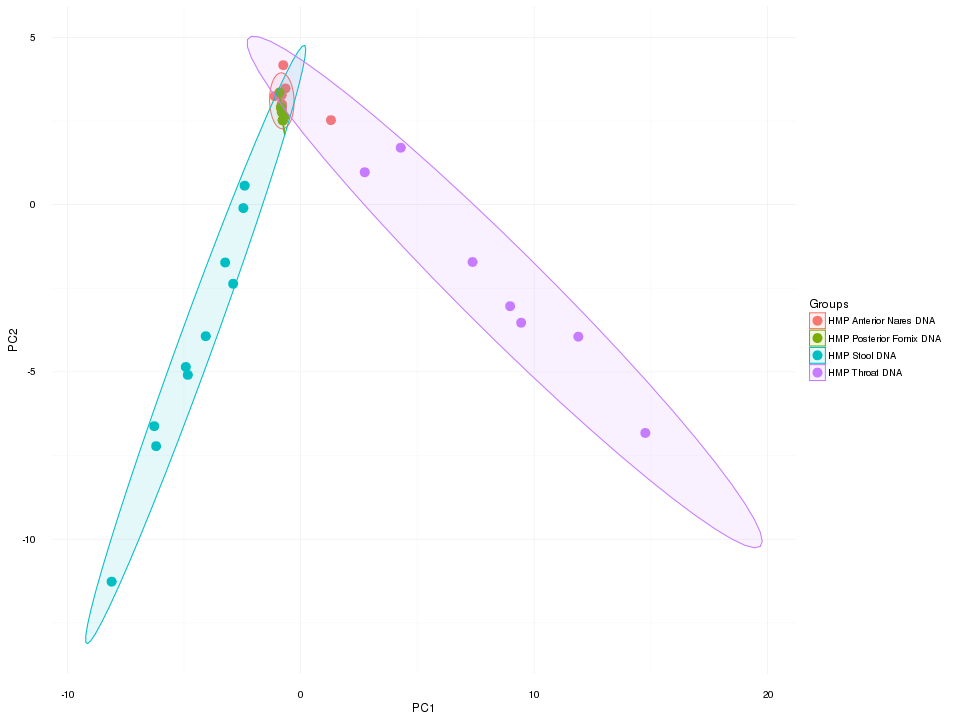

In [99]:
%%R -w 960 -h 720 -u px
plotPCA(1:2, m.pca, m.classes)

In [35]:
%%R


make_jsd_matrix <- function(n){

    m <- matrix(nrow=ncol(n),ncol=ncol(n))

    for (i in 1:ncol(n)){
        for (j in 1:ncol(n)){
            m[i,j] <- jsd(n[,i],n[,j])
        }
     }
    colnames(m) <- colnames(n)
     rownames(m) <- colnames(n)
     return(m)
}

jsd <- function(a,b){
    anorm <- a/sum(a)
    bnorm <- b/sum(b)
     m <- (anorm+bnorm)/2
     div <- kld(anorm,m)/2 + kld(bnorm,m)/2
     dist <- sqrt(div)
     return(dist) 
}

kld <- function(a,b){
     l <- log(a/b, 2)
     l[is.na(l)] <- 0
     l[is.infinite(l)] <- 0

    return( sum( a * l))
}

make_cos_matrix <- function(n){

    m <- matrix(nrow=ncol(n),ncol=ncol(n))

    for (i in 1:ncol(n)){
        for (j in 1:ncol(n)){
            m[i,j] <- cos(n[,i],n[,j])
        }
     }
    colnames(m) <- colnames(n)
     rownames(m) <- colnames(n)
     return(m)
}

cos <- function(a,b){
    dprod <- a %*% b
    magprod <- sqrt(sum(a %*% a)) * sqrt(sum(b %*% b))
    
     return(1 - (dprod/magprod)) 
}



In [65]:
%%R

library(devtools)
library(reshape2)
library(Heatplus)
library(RColorBrewer)
library(gplots)
source('../custom-code/heatmap.3.by-obi-griffith.R')

as_species <- function(n){
    species <- c(
                    "Cow",
                    "Mouse",
                    "Human",
                    "Sheep",
                    "G. Pig"
                )
    if(n == 'Guinea Pig Stool DNA'){
        return("G. Pig")
    } else if("HMP" %in% strsplit(n," ")[[1]]){
        return("Human")
    }
    for (s in species){
        if( s %in% strsplit(n," ")[[1]]){
            return(s)
        }
    }
        
    if("stool" %in% strsplit(n,"-")[[1]]){
        return("Mouse")
    }
    print(n)
    return(n)
}

my_plot_heatmap <- function(m,classes){

    cCols <- rainbow(length(unique(classes)),s=0.4)[unclass(classes)]
    #species <- as.factor(unlist(lapply(as.character(classes),FUN=as_species)))
    #sCols <- rainbow(length(unique(species)))[unclass(species)]

    #sideCols <- cbind(cCols,sCols)
    #colnames(sideCols) <- c("Experiment", "Species")
        mydist=function(c) {dist(c,method="euclidian")}
        myclust=function(c) {hclust(c,method="average")}
        heatmap.3(m,
                    scale="none",
                    hclustfun=myclust,
                    distfun=mydist,
                    ColSideColors=as.matrix(cCols),
                      ColSideColorsSize=3,
                    nrow=1,
                    labRow=FALSE,
                    labCol=FALSE,
                    margins=c(6,12),
                    key=FALSE,
                    dendrogram="row"
                    )

            legend("topleft",
               ncol=2,
               legend=as.character(unique(classes)),
               fill=unique(cCols),
               border=FALSE,
               bty="n",
               cex=1,
               y.intersp=0.7,
              )

}



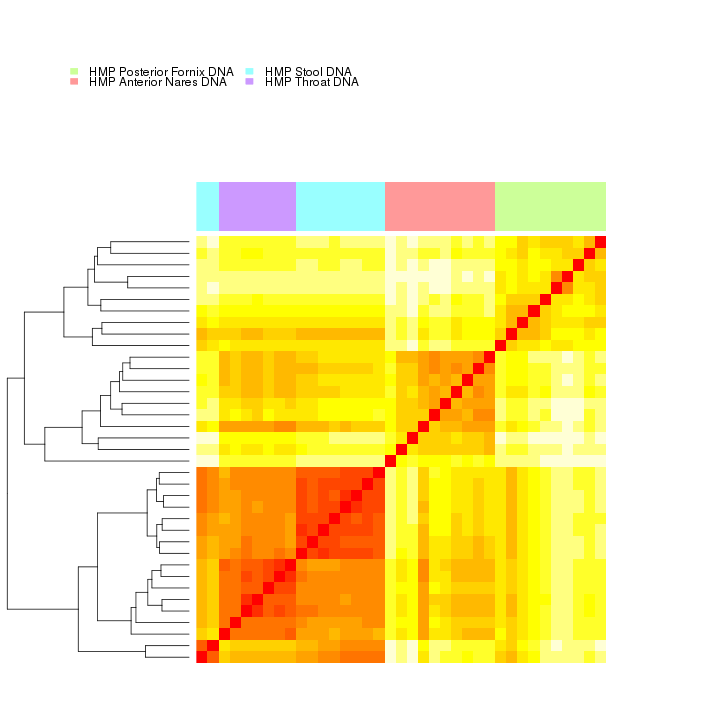

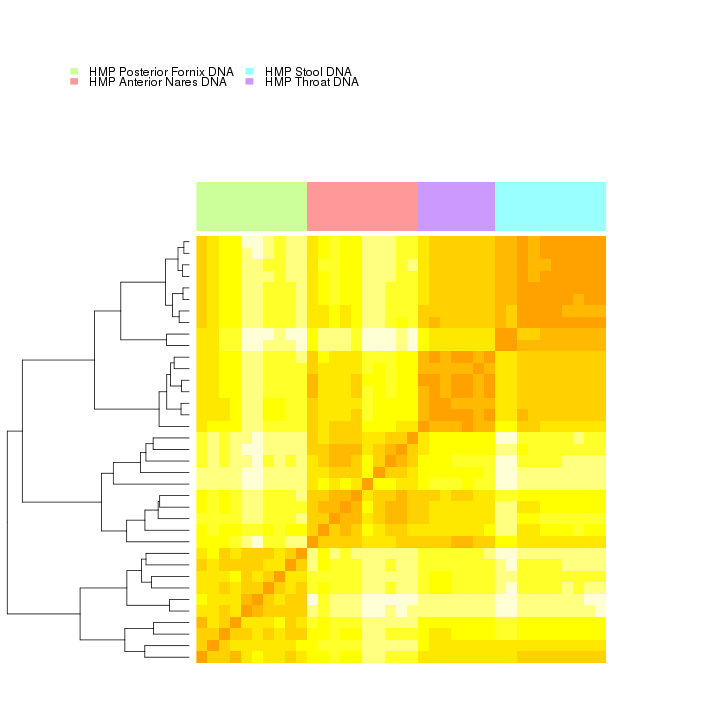

In [66]:
%%R -w 720 -h 720 -u px
adf.jdm <- make_jsd_matrix(acdmndfast)
adf.cos <- make_cos_matrix(acdmndfast)
my_plot_heatmap(adf.jdm, adf.classes)
my_plot_heatmap(adf.cos, adf.classes)

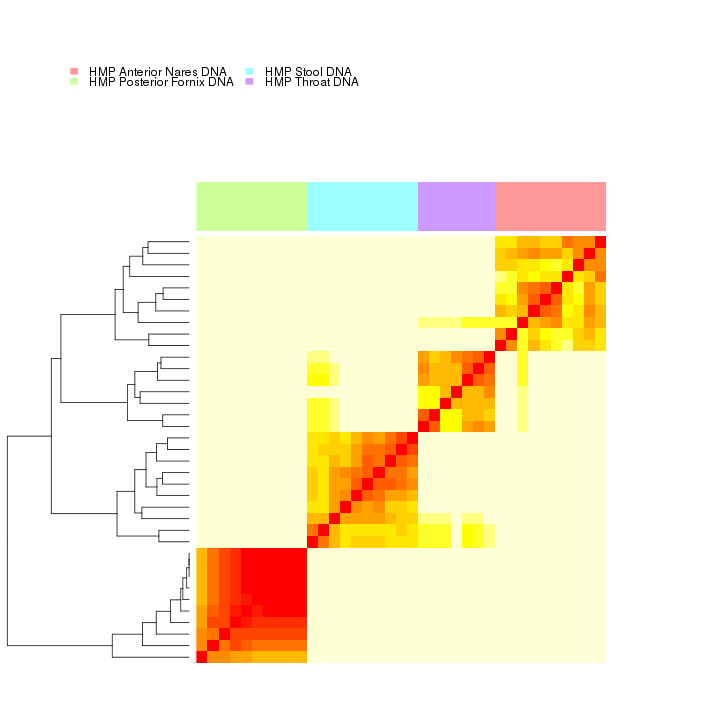

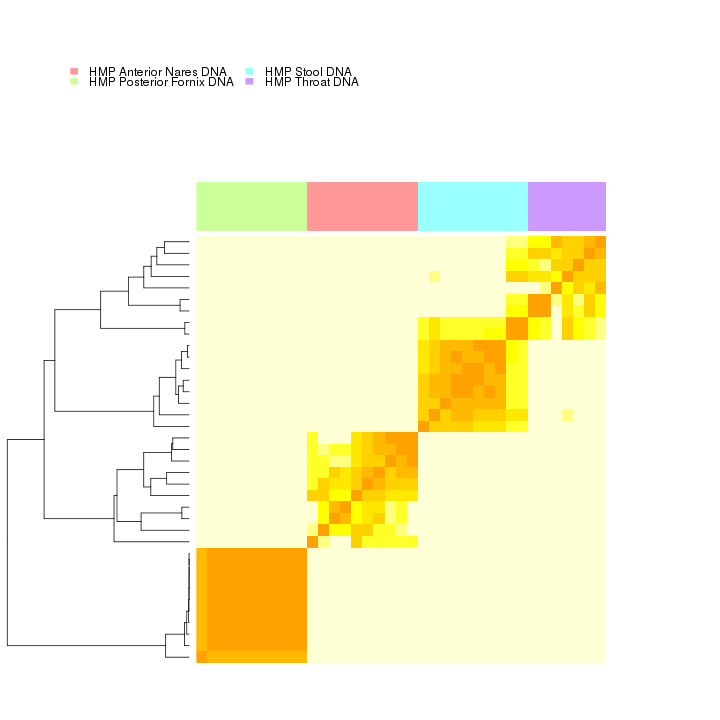

In [40]:
%%R -w 720 -h 720 -u px

m.jdm <- make_jsd_matrix(mphlan)
m.cos <- make_cos_matrix(mphlan)
my_plot_heatmap(m.jdm,m.classes)
my_plot_heatmap(m.cos,m.classes)

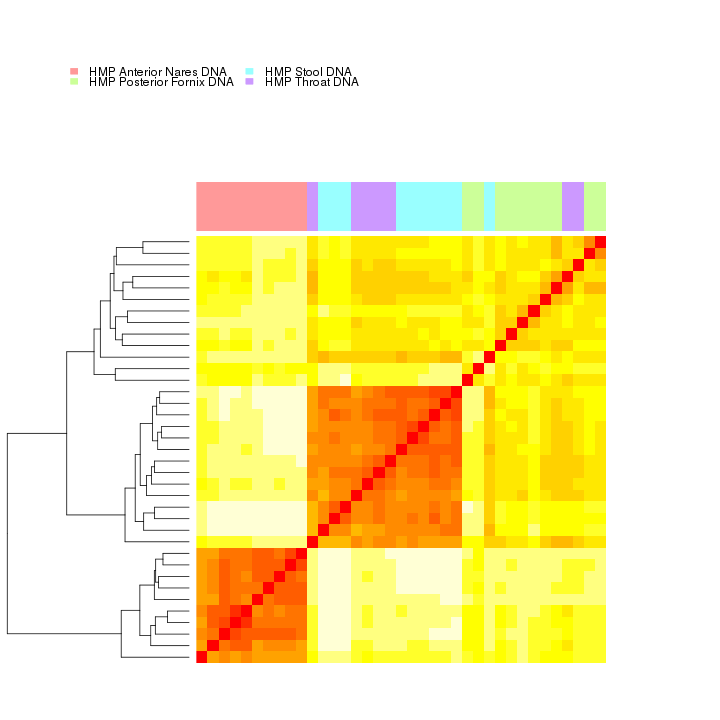

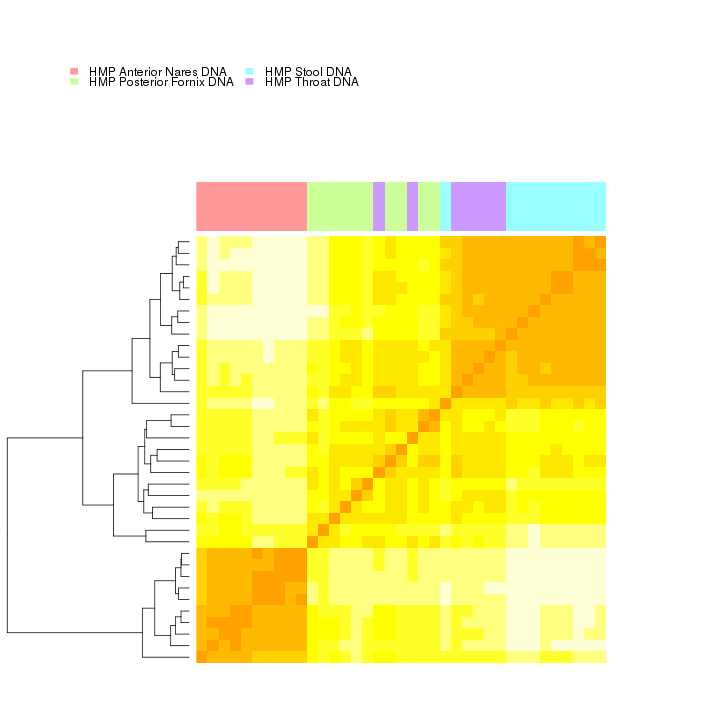

In [38]:
%%R -w 720 -h 720 -u px

k.jdm <- make_jsd_matrix(kraken)
my_plot_heatmap(k.jdm,k.classes)
k.cos <- make_cos_matrix(kraken)
my_plot_heatmap(k.cos,k.classes)

In [55]:
%%R

install.packages("gridGraphics")

Selection: 24


--- Please select a CRAN mirror for use in this session ---
HTTPS CRAN mirror 

 1: 0-Cloud [https]                2: Algeria [https]             
 3: Austria [https]                4: Belgium (Ghent) [https]     
 5: Chile [https]                  6: China (Beijing 4) [https]   
 7: Colombia (Cali) [https]        8: France (Lyon 1) [https]     
 9: France (Lyon 2) [https]       10: France (Paris 2) [https]    
11: Germany (Münster) [https]     12: Iceland [https]             
13: Italy (Padua) [https]         14: Japan (Tokyo) [https]       
15: Malaysia [https]              16: Mexico (Mexico City) [https]
17: New Zealand [https]           18: Russia (Moscow) [https]     
19: Serbia [https]                20: Spain (A Coruña) [https]    
21: Spain (Madrid) [https]        22: Switzerland [https]         
23: UK (Bristol) [https]          24: UK (Cambridge) [https]      
25: USA (CA 1) [https]            26: USA (KS) [https]            
27: USA (MI 1) [https]            28: USA (TN) [h

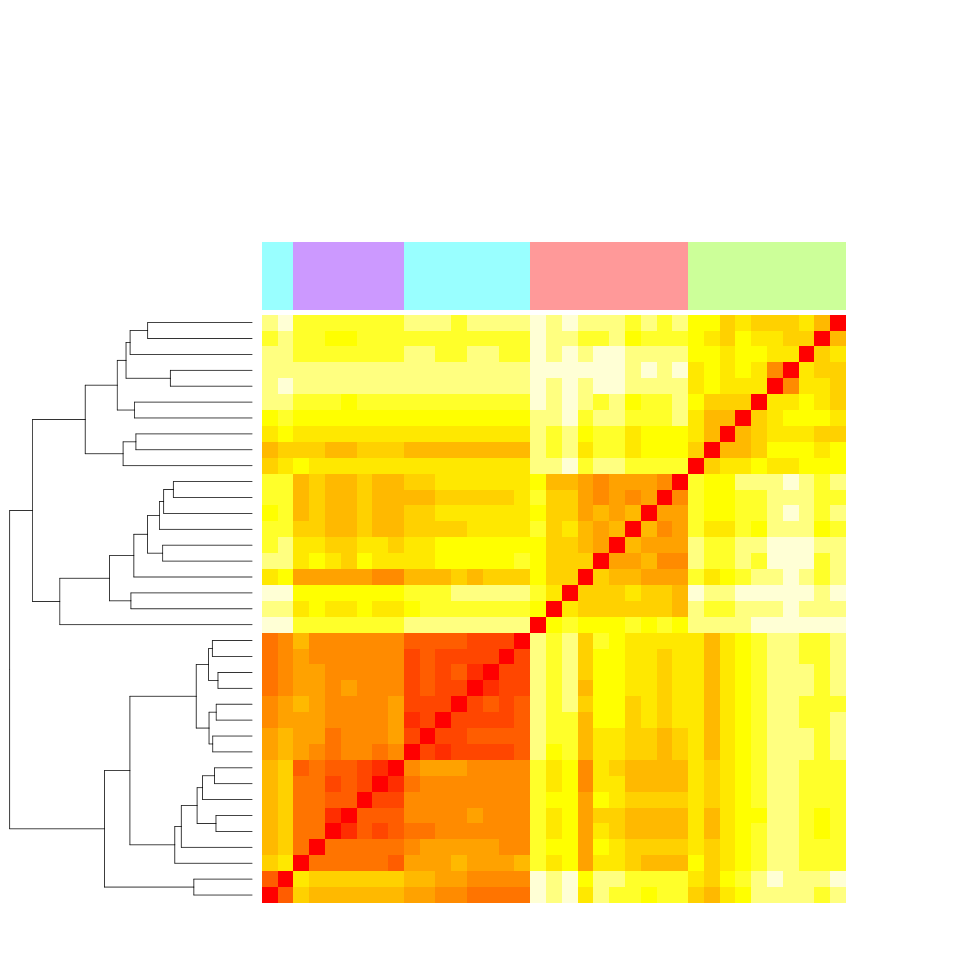

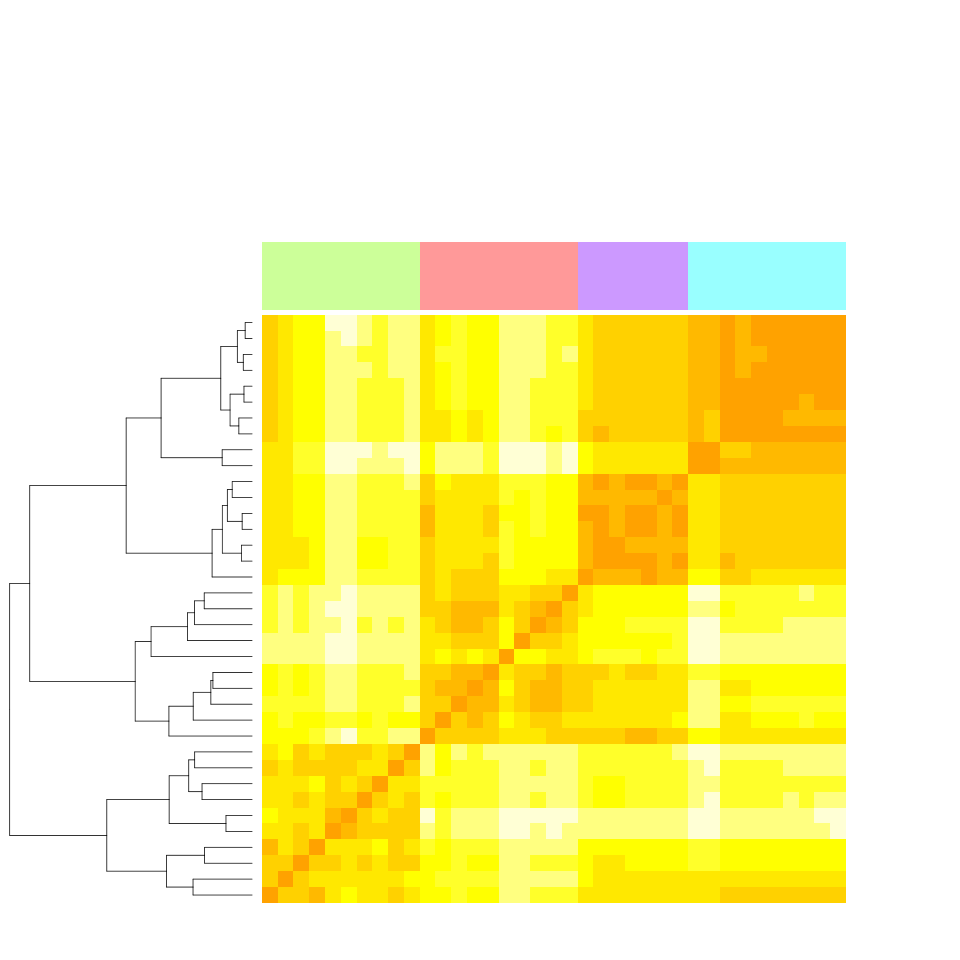

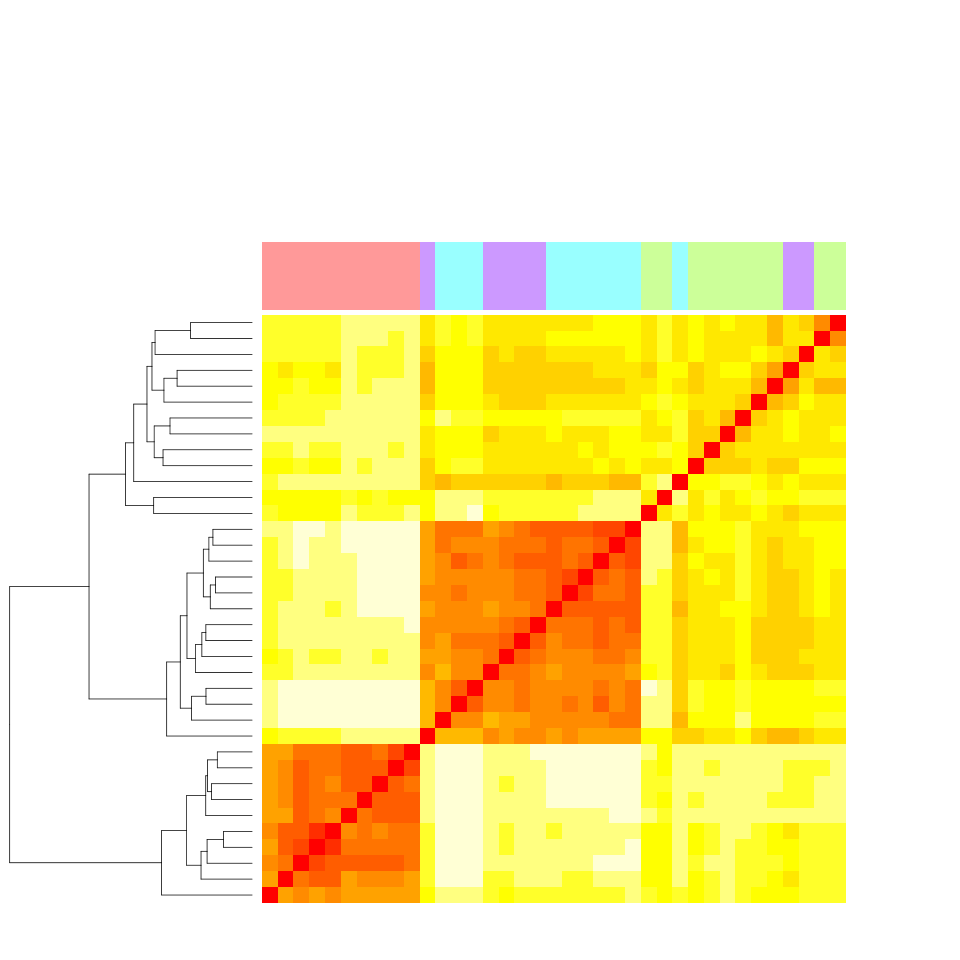

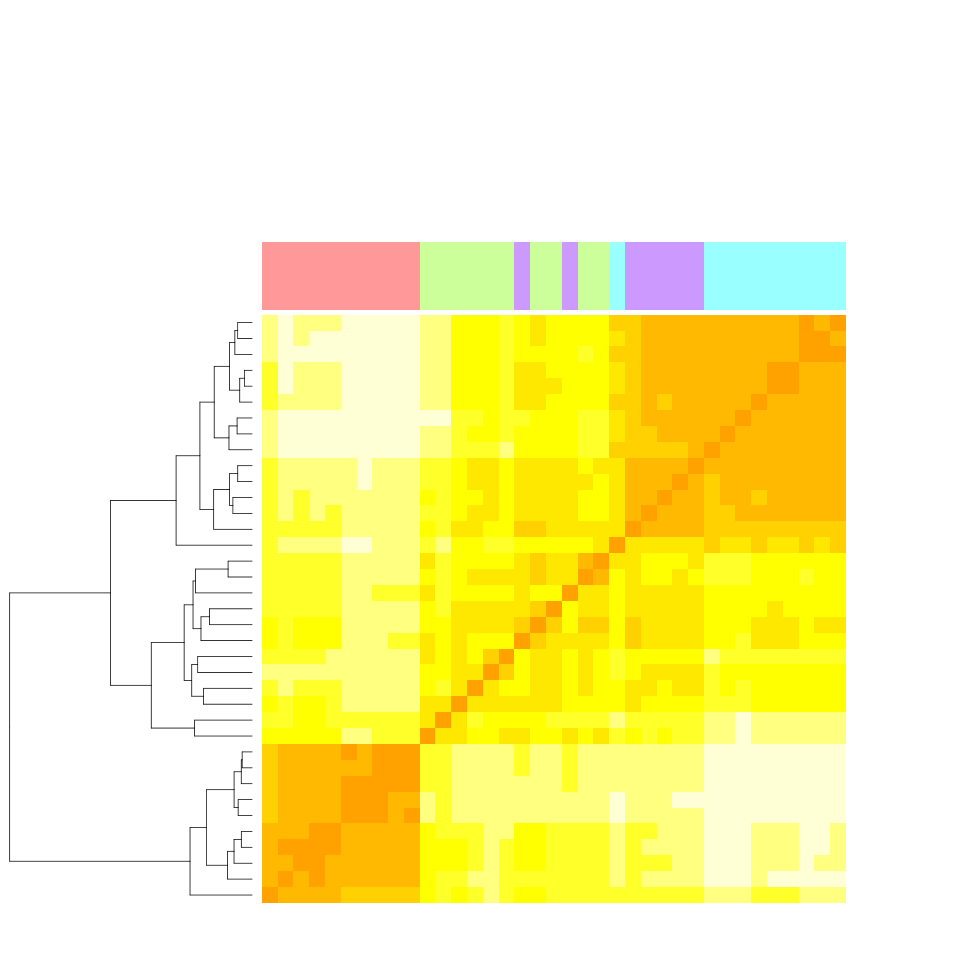

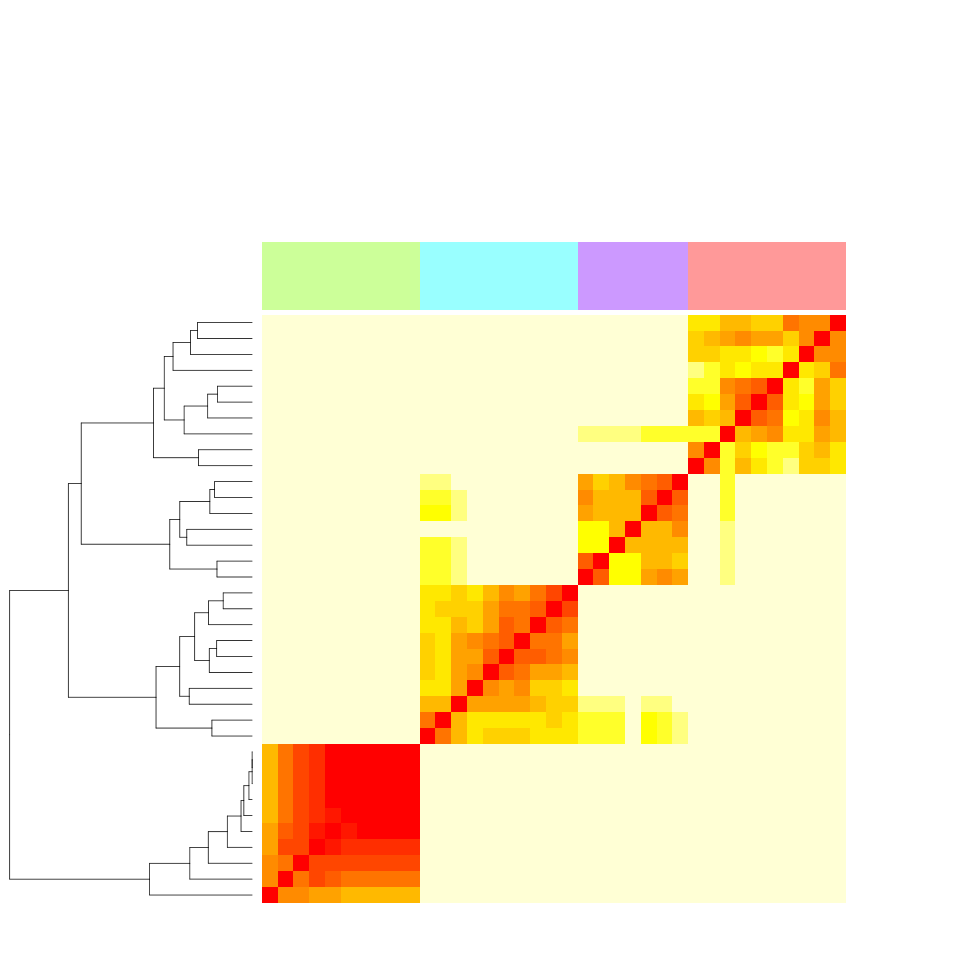

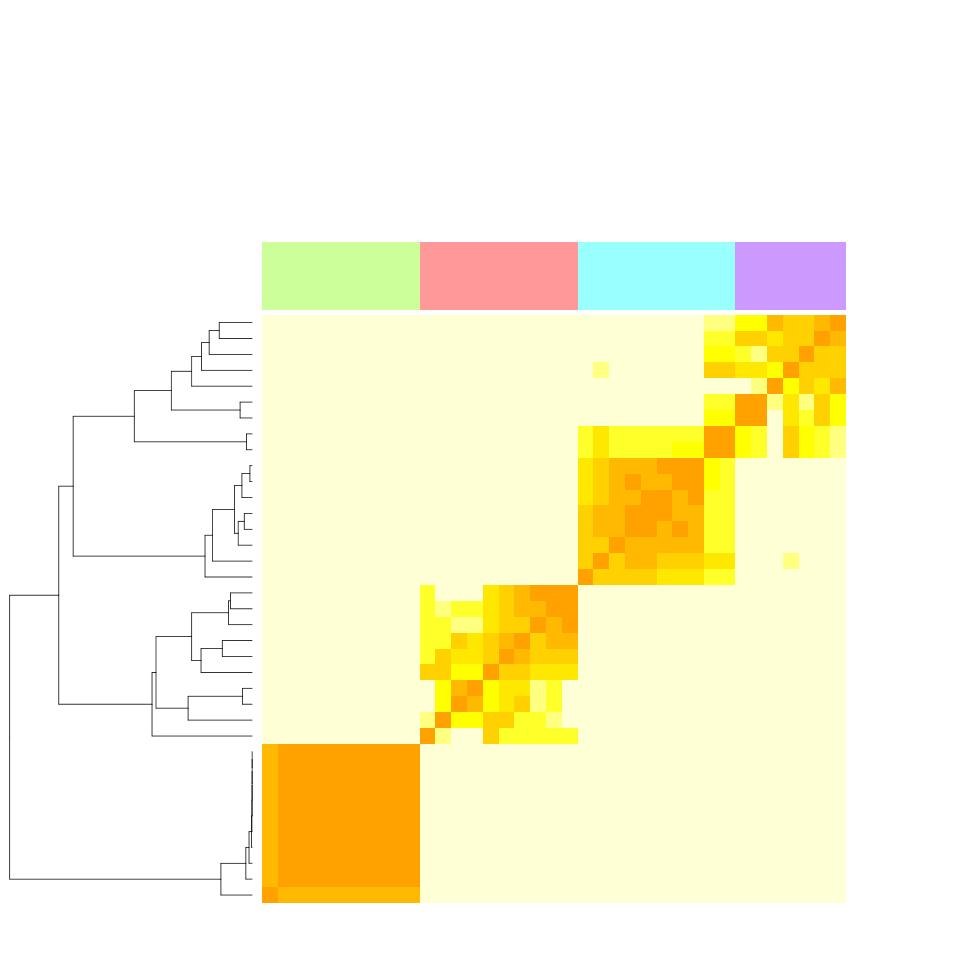

In [62]:
%%R -w 960 -h 960 -u px


library(gridGraphics)

hmap <- function(m,classes){
    
    cCols <- rainbow(length(unique(classes)),s=0.4)[unclass(classes)]
    mydist=function(c) {dist(c,method="euclidian")}
    myclust=function(c) {hclust(c,method="average")}
    h <- heatmap.3(m,
                scale="none",
                hclustfun=myclust,
                distfun=mydist,
                ColSideColors=as.matrix(cCols),
                  ColSideColorsSize=3,
                nrow=1,
                labRow=FALSE,
                labCol=FALSE,
                margins=c(6,12),
                key=FALSE,
                dendrogram="row"
                )
    grid.echo()
    grid.grab()
    return(h)
}



adf.jsd.h <- hmap(adf.jdm, adf.classes)
adf.cos.h <- hmap(adf.cos, adf.classes)
k.jsd.h <- hmap(k.jdm, k.classes)
k.cos.h <- hmap(k.cos, k.classes)
m.jsd.h <- hmap(m.jdm, m.classes)
m.cos.h <- hmap(m.cos, m.classes)



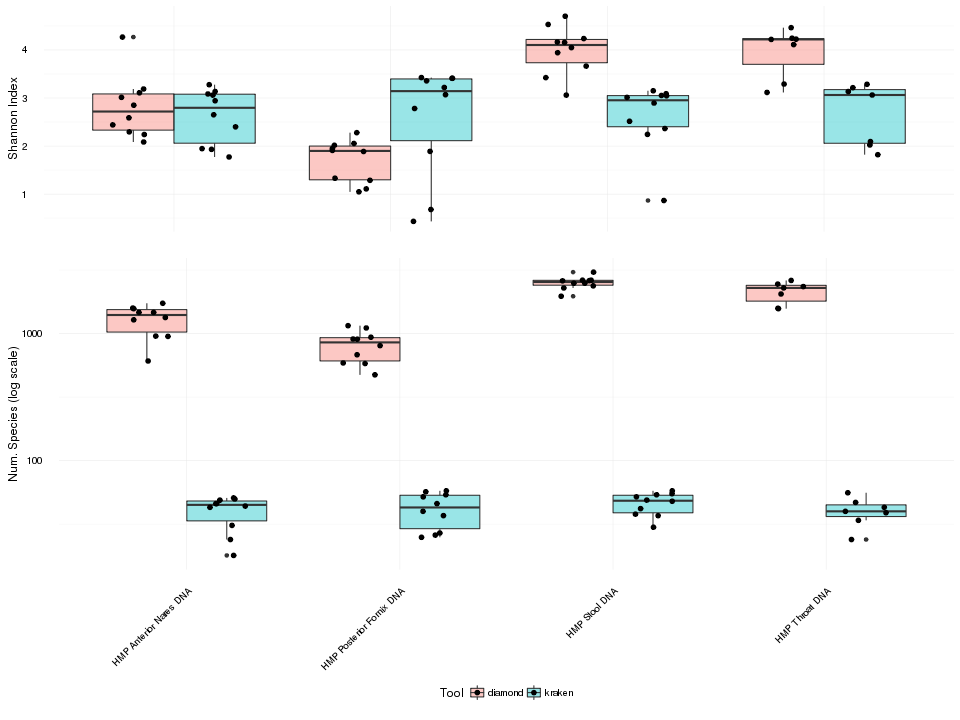

In [19]:
%%R -w 960 -h 720 -u px
dim(k.raw)

#########################################################################################
#########################################################################################
#
# Richness Figure
#
#########################################################################################
#########################################################################################

getrichness <- function(vec){
   return(sum(vec!=0)) 
}

getshannon <- function(vec){
    colsum = sum(vec)
    ps <- lapply(vec,FUN=function(el){
        p = 0.0000001 + el / colsum
        return( p * log(p))
    })
    ps <- unlist(ps)
    return(-sum(ps))
}

getsimpson <- function(vec){
    colsum = sum(vec)
    ps <- lapply(vec,FUN=function(el){
        p = 0.0000001 + el / colsum
        return( p * p)
    })
    ps <- unlist(ps)
    return(1-sum(ps))
}

k.richness <- apply(k.raw,2,getrichness)
adf.richness <- apply(adf.raw,2,getrichness)

k.shannon <- apply(k.raw,2,getshannon)
adf.shannon <- apply(adf.raw,2,getshannon)
adf.shannon.limited <- apply(adf.raw[rownames(adf.raw) %in% rownames(k.raw),],2,getshannon)

k.simpson <- apply(k.raw,2,getsimpson)
adf.simpson <- apply(adf.raw,2,getsimpson)

my_boxplot <- function(stat, groups){
    o <- order(richness)
    rtable <- data.frame(x=stat[o], grp=groups[o])
#     print(head(rtable))
    ggplot(rtable,aes(x=grp,y=x,color=grp)) + 
        geom_point() +
        geom_boxplot() +
        geom_jitter() +
        scale_y_log10()+
        theme_minimal() +
        theme(axis.text.x = element_blank(),legend.position="bottom")
}

#print(my_boxplot(k.richness,k.classes))
#print(my_boxplot(adf.richness,adf.classes))

shared.classes <- intersect( unique(adf.classes), unique(k.classes))
k.richness.shared <- k.richness[k.classes %in% shared.classes]
adf.richness.shared <- adf.richness[adf.classes %in% shared.classes]

shared.classes <- adf.classes[adf.classes %in% shared.classes]
rtable <- data.frame(group=shared.classes, diamond=adf.richness.shared, kraken=k.richness.shared)
rtable <- melt(rtable,id.vars=1)
rplot <- ggplot(rtable,aes(x=group,y=value,fill=variable)) + 
        geom_boxplot(alpha=0.4) +
        geom_point(position=position_jitterdodge(),size=2) +
        scale_y_log10()+
        theme_minimal() +
        ylab("Num. Species (log scale)") +
        theme(axis.text.x = element_text(angle = 45, hjust = 1),axis.title.x=element_blank(),legend.position="bottom") +
        scale_fill_discrete("Tool")

shared.classes <- intersect( unique(adf.classes), unique(k.classes))
k.shannon.shared <- k.shannon[k.classes %in% shared.classes]
adf.shannon.shared <- adf.shannon[adf.classes %in% shared.classes]
adf.shannon.limited.shared <- adf.shannon.limited[adf.classes %in% shared.classes]
shared.classes <- adf.classes[adf.classes %in% shared.classes]
#rtable <- data.frame(group=shared.classes, diamond=adf.shannon.shared, diamond.limited=adf.shannon.limited.shared, kraken=k.shannon.shared)
rtable <- data.frame(group=shared.classes, diamond=adf.shannon.shared, kraken=k.shannon.shared)
rtable <- melt(rtable,id.vars=1)
splot <- ggplot(rtable,aes(x=group,y=value,fill=variable)) + 
        geom_boxplot(alpha=0.4) +
        geom_point(position=position_jitterdodge(),size=2) +
        theme_minimal() +
        ylab("Shannon Index") + 
        theme(axis.text.x =element_blank(),axis.title.x=element_blank(), legend.position="none")

shared.classes <- intersect( unique(adf.classes), unique(k.classes))
k.simpson.shared <- k.simpson[k.classes %in% shared.classes]
adf.simpson.shared <- adf.simpson[adf.classes %in% shared.classes]
shared.classes <- adf.classes[adf.classes %in% shared.classes]
rtable <- data.frame(group=shared.classes, diamond=adf.simpson.shared, kraken=k.simpson.shared)
rtable <- melt(rtable,id.vars=1)
homerplot <- ggplot(rtable,aes(x=group,y=value,fill=variable)) + 
        geom_boxplot(alpha=0.4) +
        geom_point(position=position_jitterdodge(),size=2) +
        theme_minimal() +
        ylab("Gini-Simpson Index") + 
        theme(axis.text.x =element_blank(),axis.title.x=element_blank(), legend.position="none") +
        scale_fill_discrete("Tool")

#print(splot)
#print(homerplot)
#print(rplot)

grid.arrange(splot,rplot,ncol=1, heights=c(0.35,0.65))
